In [19]:
import pandas as pd
# Importando os bancos de dados
dst = pd.read_csv("../data/raw/labels.csv")
solar_wind = pd.read_csv("../data/raw/solar_wind.csv")
sunspots = pd.read_csv("../data/raw/sunspots.csv")

In [20]:
# 1 - COMPREENSÃO DO PROBLEMA - Alterando os nomes das variáveis

dst.rename(columns={'period':'per',
                          'timedelta': 'dur',
                          }, inplace=True)

#  Alterando os nomes das variáveis
sunspots.rename(columns={'period':'per',
                          'timedelta': 'dur',
                          'smoothed_ssn': 'med',}, inplace=True)

#   Alterando os nomes das variáveis
solar_wind.rename(columns={'period':'per',
                          'timedelta': 'dur',
                          'bt': 'mag',
                          'density': 'den',
                          'speed': 'vel',
                          'temperature': 'temp',
                           }, inplace=True)

# 1.Conversão dos intervalos de tempo para dados númericos;
dst['dur'] = pd.to_timedelta(dst['dur'])
sunspots['dur'] = pd.to_timedelta(sunspots['dur'])
solar_wind['dur'] = pd.to_timedelta(solar_wind['dur'])

# 2.Setar multi-índices compostos;
dst.set_index(['per', 'dur'], inplace=True)
sunspots.set_index(['per', 'dur'], inplace=True)
solar_wind.set_index(['per', 'dur'], inplace=True)

In [ ]:
import sys
import os
import importlib

# Garante que o caminho src está no sys.path
sys.path.append(os.path.abspath("../src"))

# Importa e força recarregar o módulo utils
import utils as utils
importlib.reload(utils)

# Importa as funções do módulo atualizado
from utils import (
    relatorio_missing, 
    resumo_dados, 
    visualizar_descritivas_dst,
    visualizar_descritivas_manchas,
    visualizar_descritivas_vento_solar
)


In [27]:
print(visualizar_descritivas_vento_solar(df).head().to_string())


per                train_a       train_b       train_c
bx_gse count  1.575012e+06  3.084130e+06  3.407290e+06
       mean  -1.781301e+00 -3.088789e-01 -4.619076e-01
       std    4.339212e+00  3.627830e+00  3.245485e+00
       min   -5.463000e+01 -2.937000e+01 -4.546000e+01
       25%   -4.960000e+00 -3.070000e+00 -2.800000e+00


In [32]:
# Dicionário de datasets
datasets = {
    "DST": dst,
    "Manchas Solares": sunspots,
    "Vento Solar": solar_wind
}

# Loop principal de análise
for nome, df in datasets.items():
    print(f"\n🔍 Análise para: {nome}")

    print("\n📊 Valores faltantes:")
    display(relatorio_missing(df))

    print(f"\n📋 Resumo estatístico:")
    resumo_dados(nome, df)

    print(f"\n📈 Estatísticas por período:\n")
    
    if "dst" in nome.lower():
        print(visualizar_descritivas_dst(df).head().to_string())
    
    elif "manchas" in nome.lower():
        print(visualizar_descritivas_manchas(df).head().to_string())
    
    elif "vento" in nome.lower():
        print(visualizar_descritivas_vento_solar(df).head().to_string())



🔍 Análise para: DST

📊 Valores faltantes:
Número de linhas: 139872 | Número de colunas: 1


,Pct_missing,Freq_missing
dst,0.0%,0



📋 Resumo estatístico:


### 📌 DST

**🔹 Primeiras linhas:**

dst
per     dur                 
train_a 0 days 00:00:00   -7
        0 days 01:00:00  -10
        0 days 02:00:00  -10
        0 days 03:00:00   -6
        0 days 04:00:00   -2

**🔹 Informações da Tabela:**

,Tipo,Nulos,% Nulos
dst,int64,0,0.0%



📈 Estatísticas por período:

             dst                                                    
           count       mean        std    min   25%   50%  75%   max
per                                                                 
train_a  28824.0 -16.576707  26.083191 -387.0 -26.0 -12.0 -1.0  65.0
train_b  52584.0  -9.695154  16.443049 -223.0 -17.0  -7.0  1.0  59.0
train_c  58464.0  -9.556325  16.506404 -374.0 -16.0  -7.0  0.0  67.0

🔍 Análise para: Manchas Solares

📊 Valores faltantes:
Número de linhas: 192 | Número de colunas: 1


,Pct_missing,Freq_missing
med,0.0%,0



📋 Resumo estatístico:


### 📌 Manchas Solares

**🔹 Primeiras linhas:**

med
per     dur           
train_a 0 days    65.4
        13 days   72.0
        44 days   76.9
        74 days   80.8
        105 days  85.4

**🔹 Informações da Tabela:**

,Tipo,Nulos,% Nulos
med,float64,0,0.0%



📈 Estatísticas por período:

per       train_a    train_b    train_c
count   40.000000  72.000000  80.000000
mean   136.902500  51.850000  24.313750
std     34.563168  39.200266  19.020414
min     65.400000   3.900000   2.200000
25%    108.375000  15.325000   7.775000

🔍 Análise para: Vento Solar

📊 Valores faltantes:
Número de linhas: 8392320 | Número de colunas: 15


,Pct_missing,Freq_missing
bx_gse,3.9%,325888
by_gse,3.9%,325888
bz_gse,3.9%,325888
theta_gse,3.9%,325888
phi_gse,3.9%,326388
bx_gsm,3.9%,325888
by_gsm,3.9%,325888
bz_gsm,3.9%,325888
theta_gsm,3.9%,325888
phi_gsm,3.9%,326388



📋 Resumo estatístico:


### 📌 Vento Solar

**🔹 Primeiras linhas:**

bx_gse  by_gse  bz_gse  theta_gse  phi_gse  bx_gsm  \
per     dur                                                                   
train_a 0 days 00:00:00   -5.55    3.00    1.25      11.09   153.37   -5.55   
        0 days 00:01:00   -5.58    3.16    1.17      10.10   151.91   -5.58   
        0 days 00:02:00   -5.15    3.66    0.85       7.87   146.04   -5.15   
        0 days 00:03:00   -5.20    3.68    0.68       6.17   146.17   -5.20   
        0 days 00:04:00   -5.12    3.68    0.49       4.62   145.72   -5.12   

                         by_gsm  bz_gsm  theta_gsm  phi_gsm   mag   den  \
per     dur                                                               
train_a 0 days 00:00:00    3.00    1.25      11.09   153.37  6.80  1.53   
        0 days 00:01:00    3.16    1.17      10.10   151.91  6.83  1.69   
        0 days 00:02:00    3.66    0.85       7.87   146.04  6.77  1.97   
        0 days 00:03:00    3.68    0.68       6.17   146.17  6.74  1.97   
        0 days 00:04:00    3.68    0.49       4.62   145.72  6.65  1.77   

                            vel      temp source  
per     dur                                       
train_a 0 days 00:00:00  383.92  110237.0     ac  
        0 days 00:01:00  381.79  123825.0     ac  
        0 days 00:02:00  389.11   82548.0     ac  
        0 days 00:03:00  389.11   82548.0     ac  
        0 days 00:04:00  384.26   94269.0     ac

**🔹 Informações da Tabela:**

,Tipo,Nulos,% Nulos
bx_gse,float64,325888,3.9%
by_gse,float64,325888,3.9%
bz_gse,float64,325888,3.9%
theta_gse,float64,325888,3.9%
phi_gse,float64,326388,3.9%
bx_gsm,float64,325888,3.9%
by_gsm,float64,325888,3.9%
bz_gsm,float64,325888,3.9%
theta_gsm,float64,325888,3.9%
phi_gsm,float64,326388,3.9%



📈 Estatísticas por período:

per                train_a       train_b       train_c
bx_gse count  1.575012e+06  3.084130e+06  3.407290e+06
       mean  -1.781301e+00 -3.088789e-01 -4.619076e-01
       std    4.339212e+00  3.627830e+00  3.245485e+00
       min   -5.463000e+01 -2.937000e+01 -4.546000e+01
       25%   -4.960000e+00 -3.070000e+00 -2.800000e+00


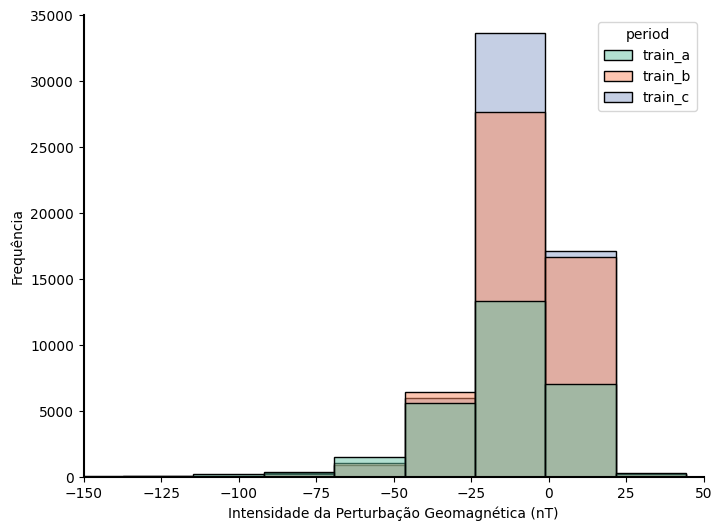

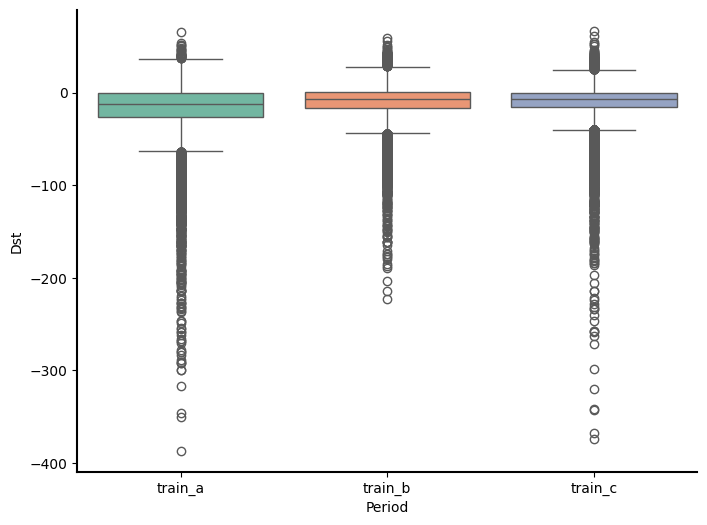

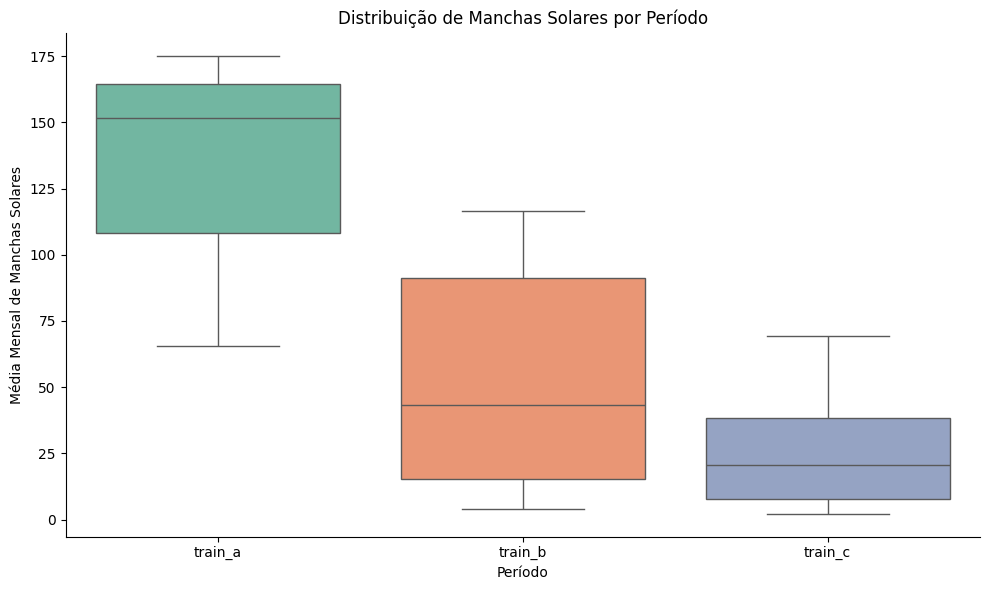

In [ ]:
import sys
sys.path.append('../src')
from utils import plot_histograma_dst, plot_boxplot_dst, plot_sunspots_boxplot

# Histograma do índice dst com hue
plot_histograma_dst(dst, coluna_valor='dst', coluna_hue='period', salvar=False)

# Boxplot simples
plot_boxplot_dst(dst, coluna_x='period', coluna_y='dst')

# 4. Execute a função
plot_sunspots_boxplot(sunspots)


In [69]:
print(solar_wind.columns)

Index(['bx_gse', 'by_gse', 'bz_gse', 'theta_gse', 'phi_gse', 'bx_gsm',
       'by_gsm', 'bz_gsm', 'theta_gsm', 'phi_gsm', 'mag', 'den', 'vel', 'temp',
       'source'],
      dtype='object')


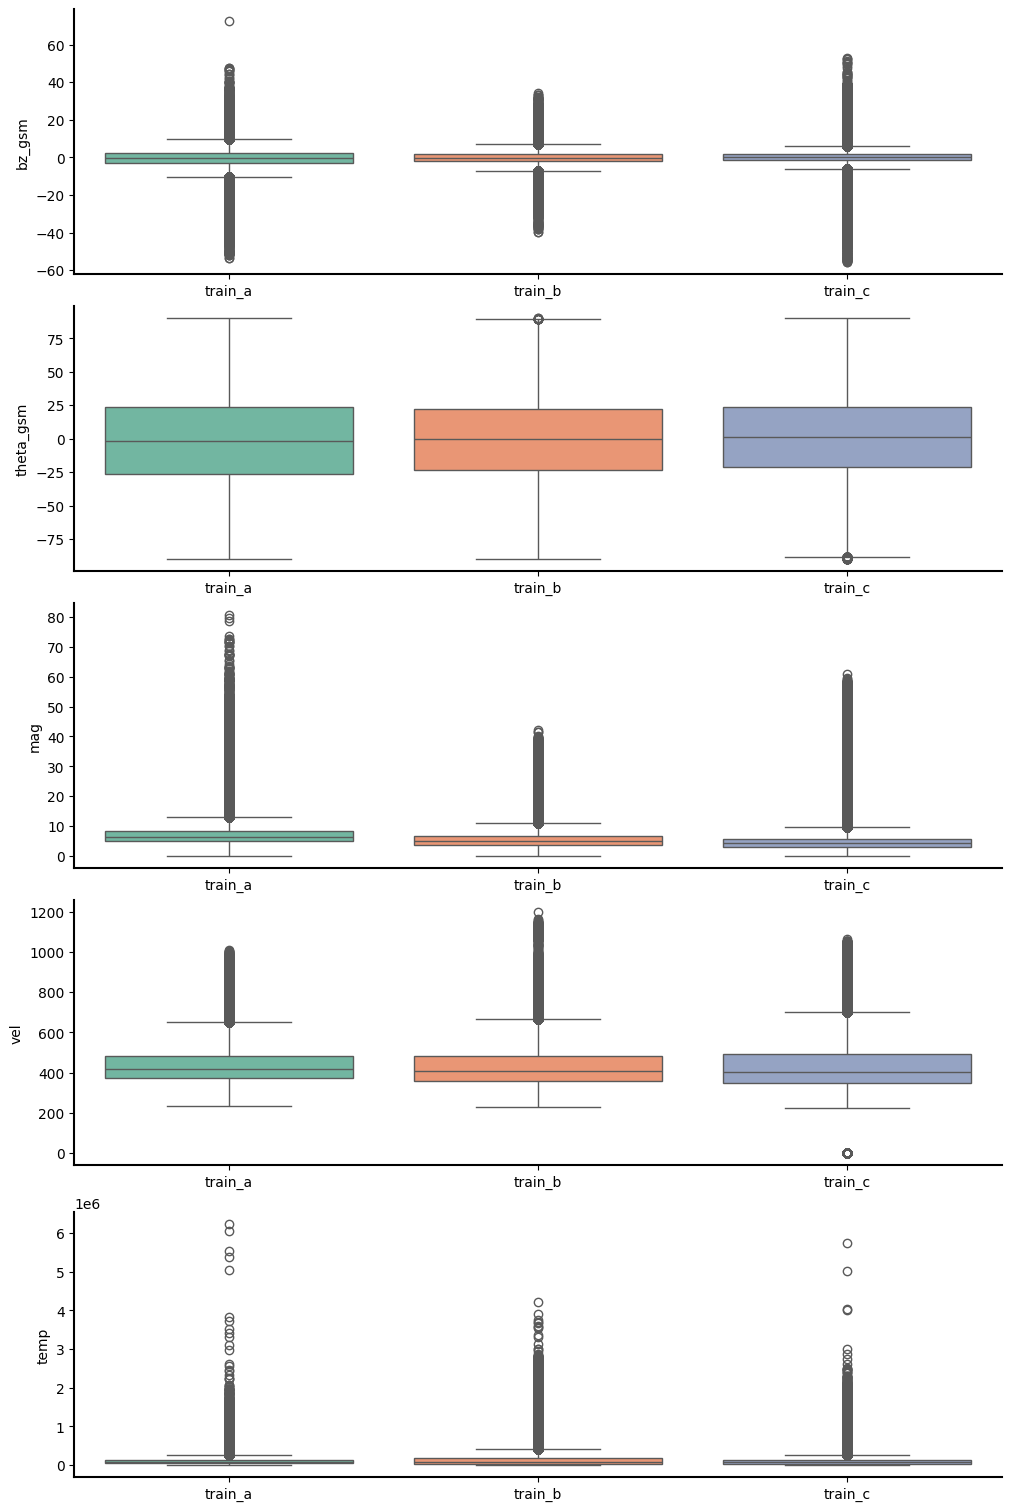

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Carregar o dataframe
# solar_wind = pd.read_csv("../data/raw/solar_wind.csv")

# Lista das variáveis numéricas que queremos visualizar
variaveis = ['bz_gsm', 'theta_gsm', 'mag', 'vel', 'temp']

fig, axes = plt.subplots(nrows=len(variaveis), ncols=1, figsize=(10, 15), constrained_layout=True)

if len(variaveis) == 1:
    axes = [axes]

for i, var in enumerate(variaveis):
    try:
        sns.boxplot(
            x='per',
            y=var,
            data=solar_wind,
            hue='per',
            palette="Set2",
            ax=axes[i]
        )

        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['bottom'].set_linewidth(1.5)
        axes[i].spines['left'].set_linewidth(1.5)
        axes[i].set_xlabel('')
        axes[i].grid(False)

        legend = axes[i].get_legend()
        if legend is not None:
            legend.remove()

    except KeyError as e:
        print(f"Erro: Variável {e} não encontrada no DataFrame.")
        continue

plt.show()
